In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import random
import math
import numpy as np

[(-2, 0.28929558211079531), (-1, 0.4821593035179923), (0, 0.80359883919665409), (1, 0.4859980653277568), (2, 0.29799677554626136)]
[ 0.10414641  0.13886188  0.23143647  0.38572744  0.64287907  0.00479845
  0.00799742  0.01332903  0.02221506  0.03702509  0.06170849  0.10284749
  0.17141248  0.28568746  0.47614576]
[(0, 0.85441025417024075), (1, 0.57068375695040097), (2, 0.43913959491733506)]
[ 0.85441025  0.07254701  0.12091168  0.20151946  0.33586577  0.0025069
  0.00417817  0.00696362  0.01160604  0.01934339  0.03223899  0.05373164
  0.08955274  0.14925457  0.24875761]
[(-2, 0.44944036535941068), (-1, 0.57857126964888073), (0, 0.86198784584471921), (1, 0.52193451426581605), (2, 0.32106371982446391)]
[ 0.45874634  0.06690995  0.11151658  0.18586097  0.30976828  0.23168029
  0.38613381  0.64355636  0.00592726  0.00987876  0.01646461  0.02744101
  0.04573502  0.07622503  0.12704172]
[(-2, 0.62918742055903232), (-1, 0.68658932893488211), (0, 0.92708172502670061), (1, 0.56146258112563929),

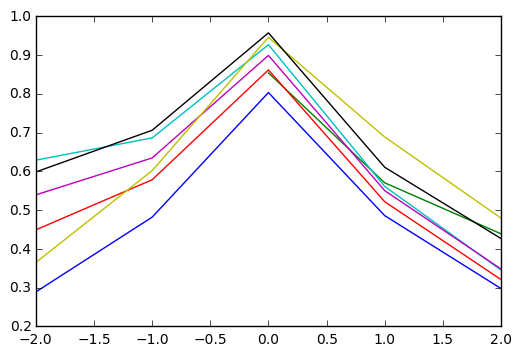

In [29]:
words = ["Gazelle", "Flamingo","Caribou", "Lion", "Whale", "Mongoose", "Anteater", "Hawk", "Tortoise", "Fox", "Pigeon", "Hedgehog", "Panda", "Newt", "Dragonfly"]
f0 = np.array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,])
w0 = np.array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,])

f_list = [f0]
w_list = [w0]
activity_profile_map = {}
beta = 0.8

def rho():
    i = len(f_list)
    return math.sqrt(1 + beta**2 * ((f_list[i-1].dot(w_list[i]))**2 - 1)) - beta*(f_list[i-1].dot(w_list[i]))

def present(word):
    w = np.array([0] * len(words))
    w[words.index(word)] = 1
    w_list.append(w)
    f = f_list[len(f_list) - 1] * rho() + beta * w
    activity_profile_map[word] = f
    f_list.append(f)
    
def lag(w1, w2):
    index1 = words.index(w1)
    index2 = words.index(w2)
    return index2 - index1

def similarity(f1, f2):
    return f1.dot(f2)
    
def recall(word):
    w = activity_profile_map[word]
    w_list.append(w)
    f = f_list[len(f_list) - 1] * rho() + beta * w
    f_list.append(f)
    
    i = words.index(word)
    lag_indices = [x for x in range(i-2, i+3)]
    lag_similarities = []
    for lag_index in lag_indices:
        if (lag_index >= 0) and (lag_index < len(words)):
            lag_words = lag(word, words[lag_index])
            similarity_words = similarity(f, activity_profile_map[words[lag_index]])
            lag_similarities.append((lag_words, similarity_words))
    print lag_similarities
    lag_list, similarities_list = map(list, zip(*lag_similarities))
    return (f, lag_list, similarities_list)

for i in range(len(words)):
    present(words[i])

recall_list = ["Whale", "Gazelle", "Hawk", "Fox", "Panda", "Tortoise", "Pigeon"]
for i in range(len(recall_list)):
    f, lag_list, similarities_list = recall(recall_list[i]) 
    print f
    
    plt.plot(lag_list, similarities_list)
